<a href="https://colab.research.google.com/github/yisiszhang/AdvancedPython/blob/main/colab/Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 3: Classification**

# Logistic regression

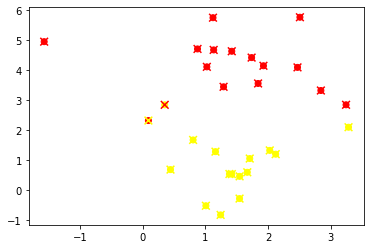

0.9333333333333333


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# make data with 2 predictors and draw from two clusters
X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=0)
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X[:,0],X[:,1],c=y, cmap='autumn')
plt.scatter(X[:,0],X[:,1],c=y_pred, s = 60, cmap='autumn', marker='x')
plt.show()

print(clf.score(X, y))

# KNN classifier

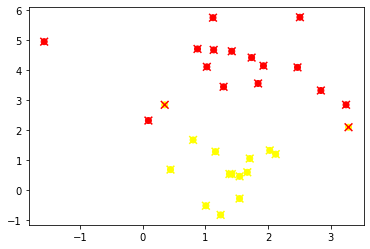

0.9333333333333333


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(X, y)
y_pred = knnclf.predict(X)

plt.scatter(X[:,0],X[:,1],c=y, cmap='autumn')
plt.scatter(X[:,0],X[:,1],c=y_pred, s = 60, cmap='autumn', marker='x')
plt.show()

print(knnclf.score(X,y))

# Linear discriminant analysis
LDA assumes that the distribution of $Pr(X=x|Y=k)=\frac{1}{\sqrt{2\pi}\sigma_k}exp(-\frac{(x-\mu_k)^2}{2\sigma_k^2})$.
Let's first take a look how it looks in a 1d, 2-class example.

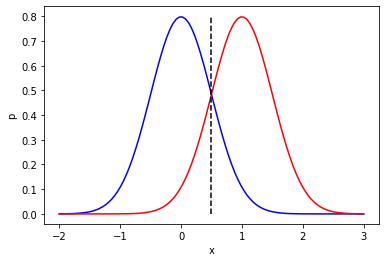

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x,mu,sigma):
  return np.exp(-(x-mu)**2/2/sigma**2)/sigma/np.sqrt(2*np.pi)

mu1 = 0
mu2 = 1
sigma1 = 0.5
sigma2 = 0.5

x = np.linspace(-2,3,100)
y1 = gauss(x, mu1, sigma1)
y2 = gauss(x, mu2, sigma2)

plt.plot(x,y1,'b-')
plt.plot(x,y2,'r-')
plt.plot([.5,.5],[0,0.8],'k--')
plt.xlabel('x')
plt.ylabel('p')
plt.show()

In [ ]:
# Let's code a simple LDA for 1d x and 2-class y
x1 = np.random.normal(0, 0.5, size=(20,1))
x2 = np.random.normal(1, 0.5, size=(20,1))
X = np.concatenate((x1,x2))
y = np.concatenate((np.zeros(20), np.ones(20)))

mu_hat = np.array([x1.mean(), x2.mean()])
sigma2_hat = (((x1-mu_hat[0])**2).sum() + ((x2-mu_hat[1])**2).sum())/(len(X)-2)
pi_hat = np.array([len(x1)/len(X), len(x2)/len(X)])

print(mu_hat)
print(sigma2_hat)
print(pi_hat)

# predict a new y based on x0
x0 = 0.3

# calculate the discriminant function
delta = x0*mu_hat/sigma2_hat - mu_hat**2/2/sigma2_hat + np.log(pi_hat)

print(delta)
print(np.argmax(delta))

[-0.04900895  0.80816177]
0.1091409132990579
[0.5 0.5]
[-0.8388636  -1.46384068]
0


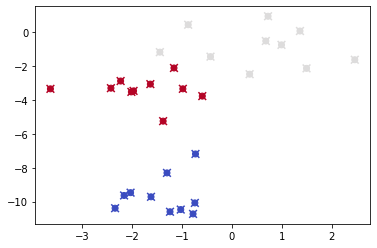

1.0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=30, centers=3, n_features=2, random_state=2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X[:,0],X[:,1],c=y, cmap='coolwarm')
plt.scatter(X[:,0],X[:,1],c=y_pred, s = 60, cmap='coolwarm', marker='x')
plt.show()

print(clf.score(X, y))

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
class_names = ['0','1']
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.score(X, y))

0.946


In [ ]:
# visualize a single tree
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

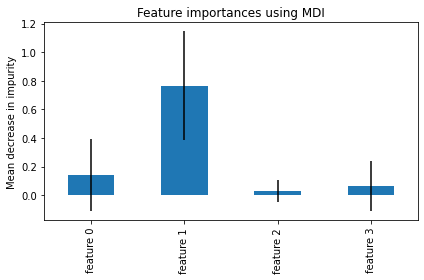

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# Support vector machine
Let's draw a hyperplane that separate two classes in a 2d space.

We are looking for the hyperplane
$$\beta_0+\beta_1x_1+\beta_2x_2=0$$
that separate the classes by maximizing the total distances for the training data to the plane.
Essentially, the total distance is
$d\propto\sum_{j=1}^ny_jf(X_j).$
In our case, the true separation is
$$x_1+x_2=0$$

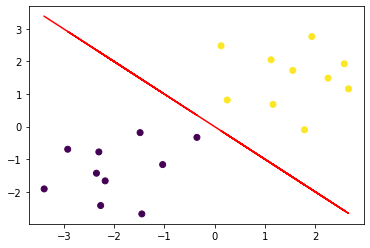

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(35)
x = np.vstack((np.random.normal(-1.5,1,size = (10,2)), np.random.normal(1.5,1,size = (10,2))))
y = np.concatenate((-np.ones(10), np.ones(10)))
sep_true = - x[:,0]
# visualize
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x[:,0], sep_true,'r-')
plt.show()

### Perceptron (optional exercise)

Find a separating hyperplane that maximize the total distance to the hyperplane:
1. Initialize $\beta$ (zeros, or anything like $y_iX_i$)
2. Take the gradient of $L=-\sum_{i\in V}y_iX_i\beta$: $\nabla L=-(\sum_{i\in V} y_i, \, \sum_{i\in V}y_iX_{1i}, \, \sum_{i\in V}y_iX_{2j})^T$, where $V$ is the collection of wrongly classified points; let $\beta =\beta- \alpha\nabla L$
3. End when all points are correctly classified.


In [ ]:
# train a hyperplane using gradient descent - perceptron
# alpha: learning rate
def sepplane_gd(x,y,alpha):
  # add ones
  n,d = x.shape
  X = np.hstack((np.ones((n,1)), x))

  # initialize betas
  beta = np.zeros(d+1)
  L = y*(X@beta)
  while any(L<=0):
    L_last = L
    ind = np.where(np.stack([y for _ in range(d+1)],axis=1) * X @ beta<=0)
    if ind:
      beta = beta + alpha * np.squeeze(np.sum(np.stack([y[ind] for _ in range(d+1)],axis=1) *X[ind,:], axis=1))
      L = y*(X@beta)
  return beta 

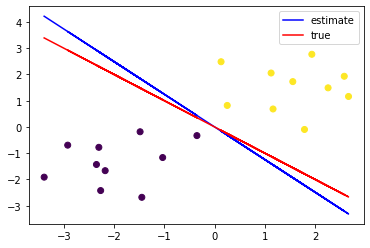

In [ ]:
# visualize
beta = sepplane_gd(x,y,alpha=0.01)
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x[:,0], -x[:,0]*beta[1]/beta[2]-beta[0]/beta[2],'b-')
plt.plot(x[:,0], sep_true,'r-')
plt.legend(['estimate','true'])
plt.show()

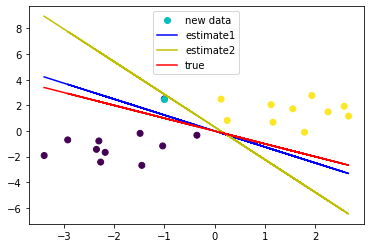

In [ ]:
# now if we add a new point, it may significantly deviate the separating plane
x1 = np.vstack((x,np.array([[-1,2.5]])))
y1 = np.concatenate((y,[-1]))
beta1 = sepplane_gd(x1,y1,alpha=0.1)

plt.scatter(x1[:,0],x1[:,1],c=y1)
plt.plot(x1[-1,0],x1[-1,1], 'co')
plt.plot(x1[:,0], -x1[:,0]*beta[1]/beta[2]-beta[0]/beta[2],'b-')
plt.plot(x1[:,0], -x1[:,0]*beta1[1]/beta1[2]-beta1[0]/beta1[2],'y-')
plt.plot(x1[:,0], -x1[:,0],'r-')
plt.legend(['new data','estimate1','estimate2','true'],loc='upper center')
plt.show()

### Maximimal margin classifier

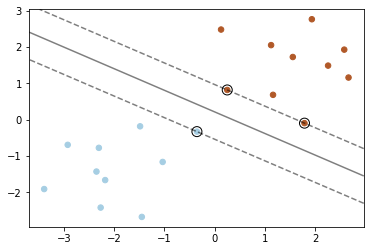

In [21]:
# There can be virtually infinite choices of the hyperplanes
# find the one that maximize the margin
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


### Support vector classifier (SVC)

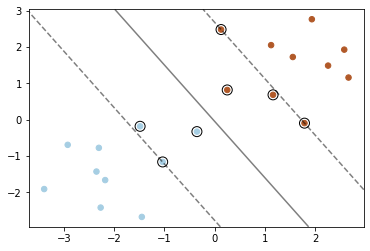

In [22]:
# change the parameter C for a soft boundary
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


So far, we have dealt with linear boundaries and they work well.
What if the data are not linear-separatable?

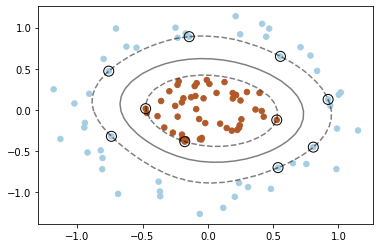

In [35]:
from sklearn import svm
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.3, noise=.1)

clf = svm.SVC(kernel='rbf', C=10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Cross-validation

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, KFold

X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

print('========================================')

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train, test in skf.split(X, y):
  print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

train -  [30 50]   |   test -  [19  1]
train -  [44 36]   |   test -  [ 5 15]
train -  [39 41]   |   test -  [10 10]
train -  [34 46]   |   test -  [15  5]
train -  [49 31]   |   test -  [ 0 20]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [39 41]   |   test -  [10 10]
train -  [40 40]   |   test -  [ 9 11]


# ROC curve

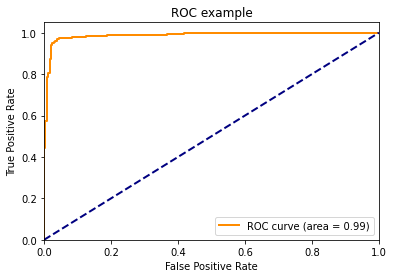

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
#y_bin = label_binarize(y, classes=[0,1])
#n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc="lower right")
plt.show()

# Homework
1. Increase the noise of the SVM data, use cross-validation to determine C.
2. Report test error of this problem.